In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# The dataset
This dataset contains data on several facets relating to healtcare and poverty in the five BRICS nations (Brazil, Russian Federation, India, China, South Africa).  
The data is annual from 1970 - 2019

In [2]:
# reading the dataset
health = pd.read_csv('../BRICS Development Indicators/HealthAndPoverty_Data.csv', sep=';')
health.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970.0,77.1184
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,1970.0,38.6866
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,1970.0,108.3178
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,1970.0,29.8818
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,1970.0,93.7106


In [3]:
# Taking a look at the datatypes and nussl values
# Year is in float format
# Most missing values are in 'Value" column
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69500 entries, 0 to 69499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   69350 non-null  object 
 1   SeriesCode   69250 non-null  object 
 2   CountryName  69250 non-null  object 
 3   CountryCode  69250 non-null  object 
 4   Year         69500 non-null  float64
 5   Value        30019 non-null  float64
dtypes: float64(2), object(4)
memory usage: 3.2+ MB


In [4]:
# Removing the rows with missing values
health.drop(health[health['Value'].isna()].index, inplace=True)
print(health.isna().sum())


SeriesName     0
SeriesCode     0
CountryName    0
CountryCode    0
Year           0
Value          0
dtype: int64


In [5]:
# Converting 'Year" column to datetime format
health['Year'] = pd.to_datetime(health['Year'], format='%Y').dt.year
health.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970,77.1184
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,1970,38.6866
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,1970,108.3178
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,1970,29.8818
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,1970,93.7106


# The data
There are 263 unique values in SeriesName  
Therefore we have data on 263 different categories for all five countries.  
    
Major categories are
> - Population
> - Demographics
> - Sex Ratio
> - Birth Rate, Death Rate, Fertility Rate
> - Mortality in different age groups
> - Access to hospital and sanitation
> - Age dependency 
> - Share of income

In [11]:
# Taking a look at the data
print(health['SeriesName'].nunique(), 'unique values in SeriesName')
#health['SeriesName'].unique()

263 unique values in SeriesName


In [12]:
# CReating a column for differentiating gender

health['Sex'] = health['SeriesName'].apply(lambda x: 'Female' if 'female' in x else ('Male' if 'male' in x else 'NA'))
health.sample(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex
64720,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y,Brazil,BRA,2016,6.909623e+00,Female
16945,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Brazil,BRA,1982,3.838000e+00,NA
15774,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,South Africa,ZAF,1981,6.390000e+01,NA
45246,"Population ages 0-14, male",SP.POP.0014.MA.IN,China,CHN,2002,1.568429e+08,Male
45265,"Population ages 05-09, male (% of male populat...",SP.POP.0509.MA.5Y,Brazil,BRA,2002,9.900039e+00,Male
9293,"Population ages 65 and above, male (% of male ...",SP.POP.65UP.MA.ZS,Russian Federation,RUS,1976,5.495893e+00,Male
39831,"Population ages 55-59, female (% of female pop...",SP.POP.5559.FE.5Y,China,CHN,1998,3.429536e+00,Female
50886,"Population ages 20-24, male (% of male populat...",SP.POP.2024.MA.5Y,China,CHN,2006,8.064043e+00,Male
41141,"Population ages 15-64, male (% of male populat...",SP.POP.1564.MA.ZS,China,CHN,1999,6.786708e+01,Male
53408,Number of maternal deaths,SH.MMR.DTHS,Russian Federation,RUS,2008,4.900000e+02,NA


# Population in different age groups

In [19]:
#health[health['SeriesName'].str.contains('% of male population|% of female population', case=False)]['SeriesName'].unique()

In [20]:
# Selecting relevant columns
demographics = health[health['SeriesName'].str.contains('% of male population|% of female population', case=False)]
demographics.drop(demographics[demographics['SeriesName'].str.contains(' 0-14|15-64|65-69|70-74|75-79|80 and above')].index, inplace=True)
demographics.sample(10)


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex
5042,"Population ages 35-39, female (% of female pop...",SP.POP.3539.FE.5Y,India,IND,1973,5.794042,Female
59308,"Population ages 60-64, male (% of male populat...",SP.POP.6064.MA.5Y,Russian Federation,RUS,2012,5.026997,Male
10530,"Population ages 15-19, female (% of female pop...",SP.POP.1519.FE.5Y,Brazil,BRA,1977,11.007658,Female
41191,"Population ages 40-44, female (% of female pop...",SP.POP.4044.FE.5Y,China,CHN,1999,6.683778,Female
25910,"Population ages 45-49, female (% of female pop...",SP.POP.4549.FE.5Y,Brazil,BRA,1988,4.133253,Female
23039,"Population ages 10-14, male (% of male populat...",SP.POP.1014.MA.5Y,South Africa,ZAF,1986,11.812835,Male
10522,"Population ages 10-14, female (% of female pop...",SP.POP.1014.FE.5Y,India,IND,1977,11.617133,Female
48108,"Population ages 20-24, male (% of male populat...",SP.POP.2024.MA.5Y,Russian Federation,RUS,2004,9.062973,Male
50992,"Population ages 65 and above, male (% of male ...",SP.POP.65UP.MA.ZS,India,IND,2006,4.401547,Male
52284,"Population ages 25-29, female (% of female pop...",SP.POP.2529.FE.5Y,South Africa,ZAF,2007,9.025868,Female


In [21]:
# Categorising into age groups

def age_grp(x):
    if '00-04' in x or '05-09' in x:
        return 'Kids'
    elif '10-14' in x:
        return 'Prepubescent'
    elif '15-19' in x:
        return 'Adolescent'
    elif '20-24' in x or '25-29' in x or '30-34' in x or '35-39' in x:
        return 'Young'
    elif '40-44' in x or '45-49' in x or '50-54' in x or '55-59' in x:
        return 'Middle aged'
    elif '60-64' in x or '65 and above' in x:
        return 'Old'
    else:
        'NONE'
        
demographics['AgeGroup'] = demographics['SeriesName'].apply(lambda x: age_grp(x))
demographics.sample(10)


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex,AgeGroup
63461,"Population ages 55-59, female (% of female pop...",SP.POP.5559.FE.5Y,China,CHN,2015,5.823525,Female,Middle aged
16177,"Population ages 40-44, male (% of male populat...",SP.POP.4044.MA.5Y,India,IND,1981,4.792837,Male,Middle aged
67644,"Population ages 60-64, female (% of female pop...",SP.POP.6064.FE.5Y,South Africa,ZAF,2018,3.221092,Female,Old
18990,"Population ages 60-64, female (% of female pop...",SP.POP.6064.FE.5Y,Brazil,BRA,1983,2.176228,Female,Old
67520,"Population ages 15-19, female (% of female pop...",SP.POP.1519.FE.5Y,Brazil,BRA,2018,7.723580,Female,Adolescent
30065,"Population ages 35-39, male (% of male populat...",SP.POP.3539.MA.5Y,Brazil,BRA,1991,6.550958,Male,Young
17558,"Population ages 35-39, male (% of male populat...",SP.POP.3539.MA.5Y,Russian Federation,RUS,1982,5.412922,Male,Young
5096,"Population ages 60-64, male (% of male populat...",SP.POP.6064.MA.5Y,China,CHN,1973,2.394510,Male,Old
63341,"Population ages 10-14, female (% of female pop...",SP.POP.1014.FE.5Y,China,CHN,2015,5.607396,Female,Prepubescent
20311,"Population ages 25-29, female (% of female pop...",SP.POP.2529.FE.5Y,China,CHN,1984,8.275939,Female,Young


In [25]:
grp = demographics.groupby(['CountryName', 'Year', 'AgeGroup', 'Sex']).sum()
grp.reset_index(inplace=True)
grp.sample(5)

,CountryName,Year,AgeGroup,Sex,Value
2897,South Africa,2011,Middle aged,Male,17.724029
384,Brazil,2002,Adolescent,Female,9.773376
1528,India,1997,Middle aged,Female,16.806397
2769,South Africa,2000,Prepubescent,Male,12.082936
1680,India,2010,Adolescent,Female,9.542532


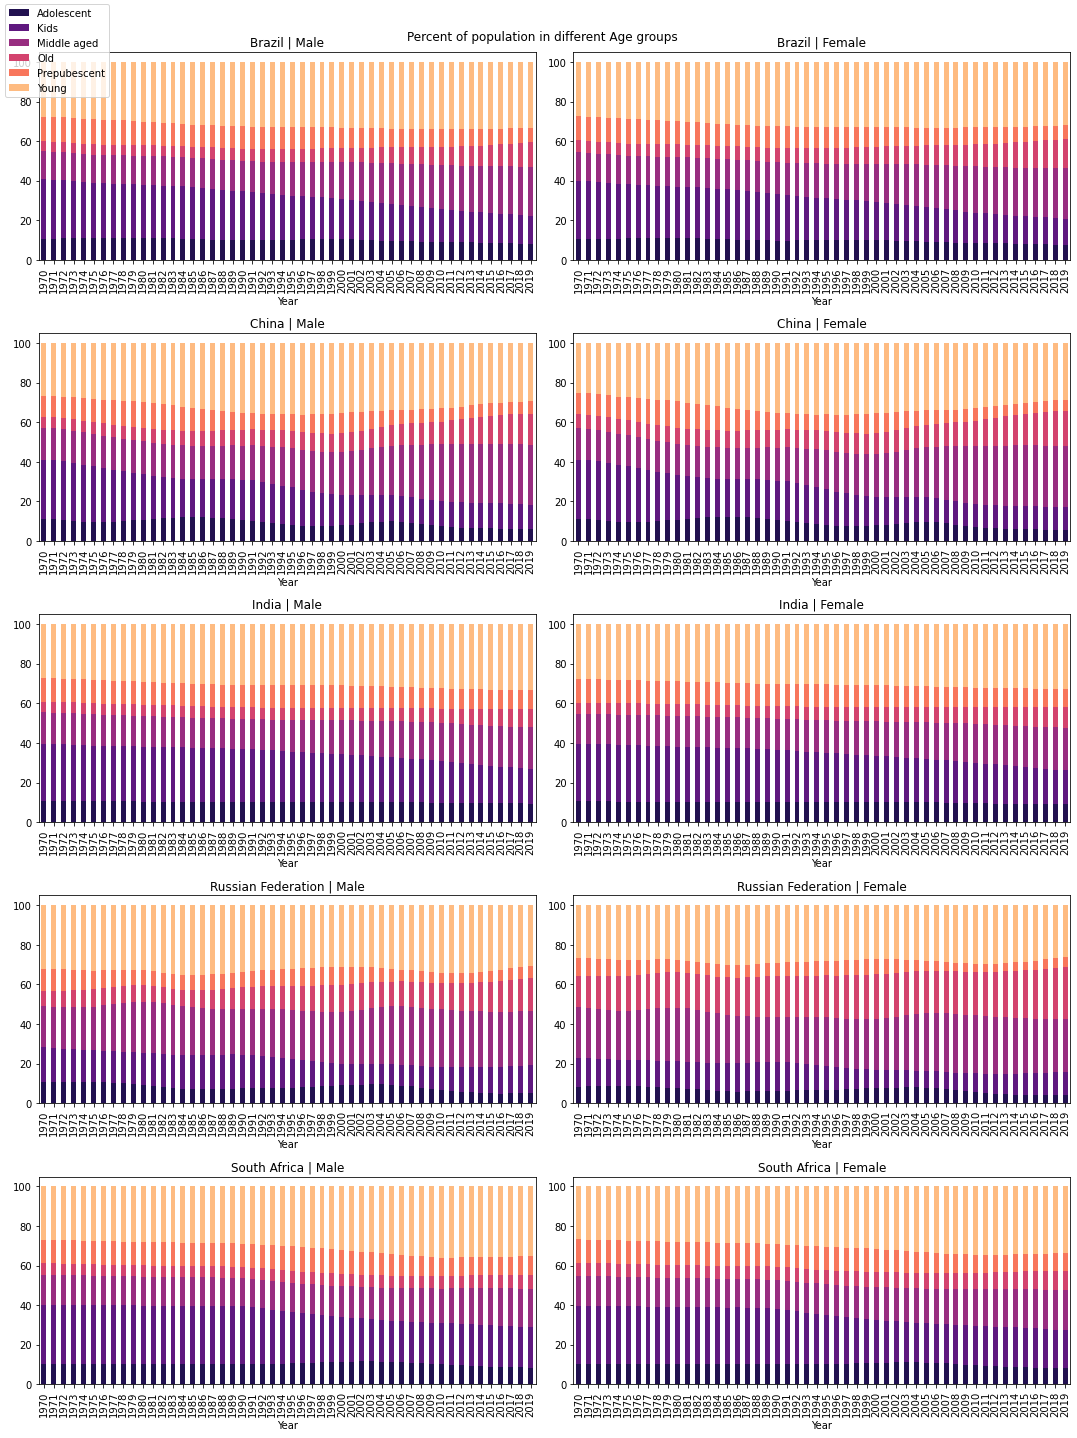

In [24]:
sns.set_palette('magma')
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
for i, country in enumerate(grp['CountryName'].unique()):
    for j, sex in enumerate(['Male', 'Female']):
        a = grp[(grp['CountryName']==country) & (grp['Sex']==sex)]
        piv = a.pivot(index='Year', columns='AgeGroup', values='Value')
        piv.plot(kind='bar', stacked=True, ax=axs[i, j], legend=False, title=f'{country} | {sex}')
fig.legend(labels=a['AgeGroup'].unique(), loc='upper left')
fig.suptitle('Percent of population in different Age groups')
plt.tight_layout()


# Male and Female population for each country

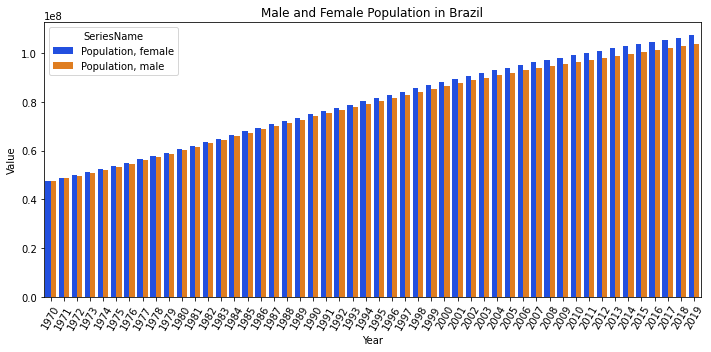

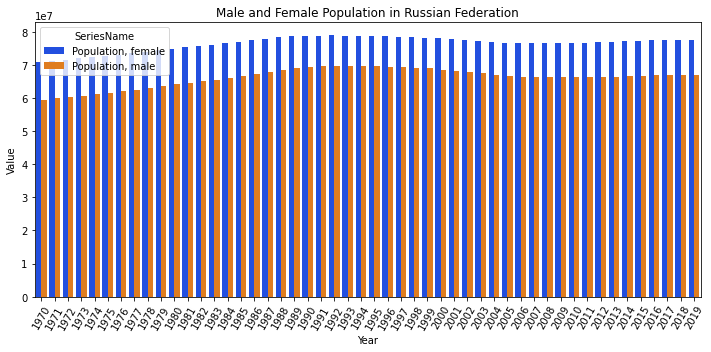

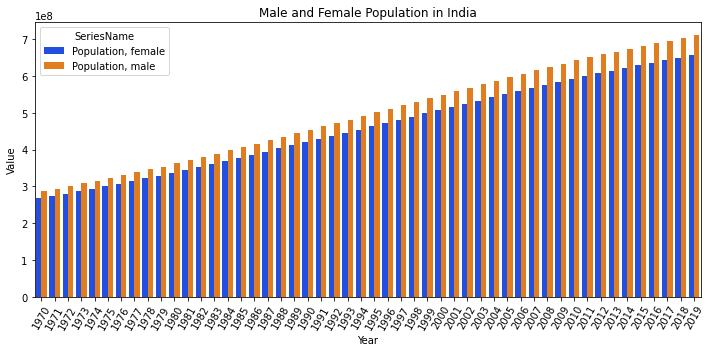

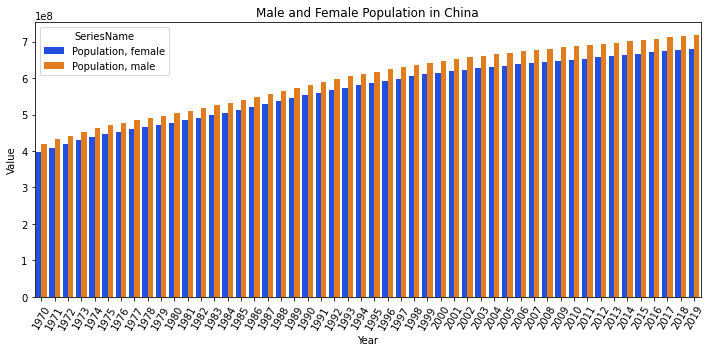

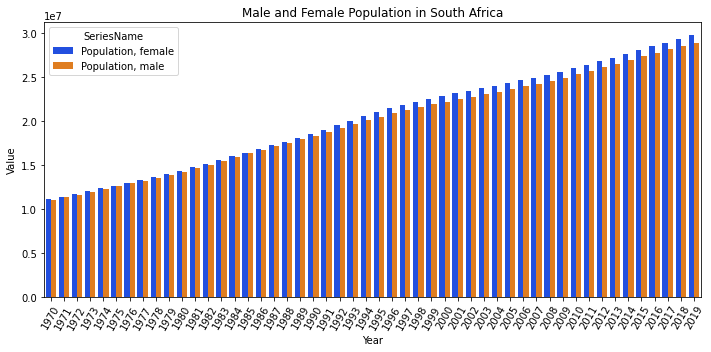

In [26]:

sns.set_palette('bright')
countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
pop_male_female = health[(health['SeriesName'] == 'Population, female') | (health['SeriesName'] == 'Population, male')]

for i, country in enumerate(countries):
    a = pop_male_female[pop_male_female['CountryName']==country]
    plt.figure(figsize=(10,5))
    sns.barplot(data=a, x='Year', y='Value', hue='SeriesName', ci=None).set_title(f'Male and Female Population in {country}')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()


# Sex ratio at birth  
Male births per female births

In [27]:
sex_ratio = health.copy()
sex_ratio = sex_ratio[sex_ratio['SeriesName'] ==
                      'Sex ratio at birth (male births per female births)']
sex_ratio.groupby(['CountryName','Year']).sum().unstack()

Value                                                   \
Year                 1972   1977   1982   1987   1990   1992   1997   2002   
CountryName                                                                  
Brazil              1.050  1.050  1.050  1.050  1.050  1.050  1.050  1.050   
China               1.070  1.070  1.070  1.080  1.104  1.120  1.140  1.160   
India               1.057  1.067  1.084  1.092  1.100  1.106  1.111  1.112   
Russian Federation  1.049  1.050  1.049  1.053  1.056  1.058  1.060  1.062   
South Africa        1.032  1.033  1.033  1.032  1.031  1.031  1.030  1.031   

                                                                            \
Year                 2007   2008   2009   2010   2011   2012   2013   2014   
CountryName                                                                  
Brazil              1.050  1.050  1.050  1.050  1.050  1.050  1.050  1.050   
China               1.170  1.166  1.162  1.158  1.154  1.150  1.146  1.142   
India               1.101  1.101  1.100  1.100  1.099  1.099  1.099  1.099   
Russian Federation  1.058  1.058  1.058  1.059  1.059  1.059  1.059  1.059   
South Africa        1.031  1.031  1.031  1.031  1.031  1.031  1.031  1.031   

                                                
Year                 2015   2016   2017   2018  
CountryName                                     
Brazil              1.050  1.050  1.050  1.050  
China               1.138  1.134  1.130  1.126  
India               1.099  1.099  1.099  1.100  
Russian Federation  1.059  1.059  1.059  1.058  
South Africa        1.031  1.031  1.031  1.031

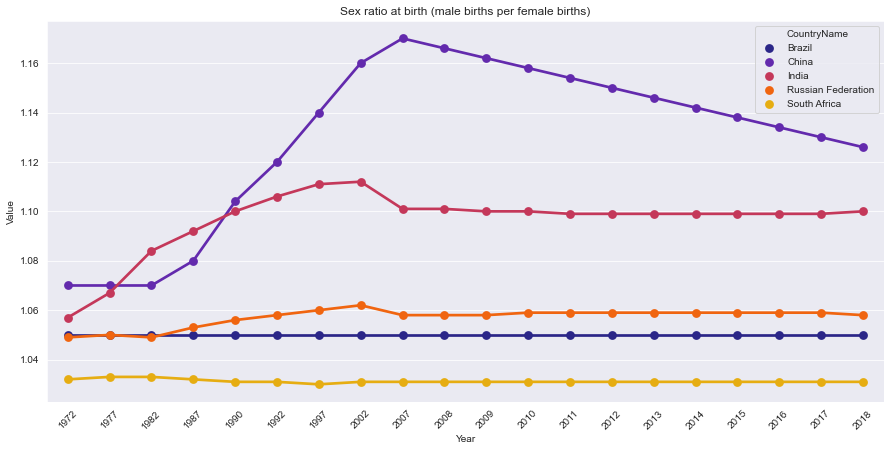

In [33]:
sns.set_palette('CMRmap')
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.pointplot(data=sex_ratio, x='Year', y='Value', hue='CountryName').set_title(
    'Sex ratio at birth (male births per female births)')
plt.xticks(rotation=45)
plt.show()


# Birth Rate, Death Rate & Fertility Rate

In [36]:
birth_death_rate = health.copy()
birth_death_rate = birth_death_rate[(birth_death_rate['SeriesName'] == 'Birth rate, crude (per 1,000 people)') | 
                                    (birth_death_rate['SeriesName'] == 'Death rate, crude (per 1,000 people)') |
                                    (birth_death_rate['SeriesName'] == 'Fertility rate, total (births per woman)')]
birth_death_rate.sample(10)


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex
23686,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,China,CHN,1987,23.330,NA
62720,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,Brazil,BRA,2015,6.250,NA
21023,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,Russian Federation,RUS,1985,11.300,NA
26469,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,South Africa,ZAF,1989,31.408,NA
2838,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,Russian Federation,RUS,1972,14.962,NA
40481,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,China,CHN,1999,6.460,NA
20907,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,India,IND,1985,34.418,NA
5827,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,India,IND,1974,5.278,NA
43356,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,China,CHN,2001,1.597,NA
41874,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,South Africa,ZAF,2000,12.107,NA


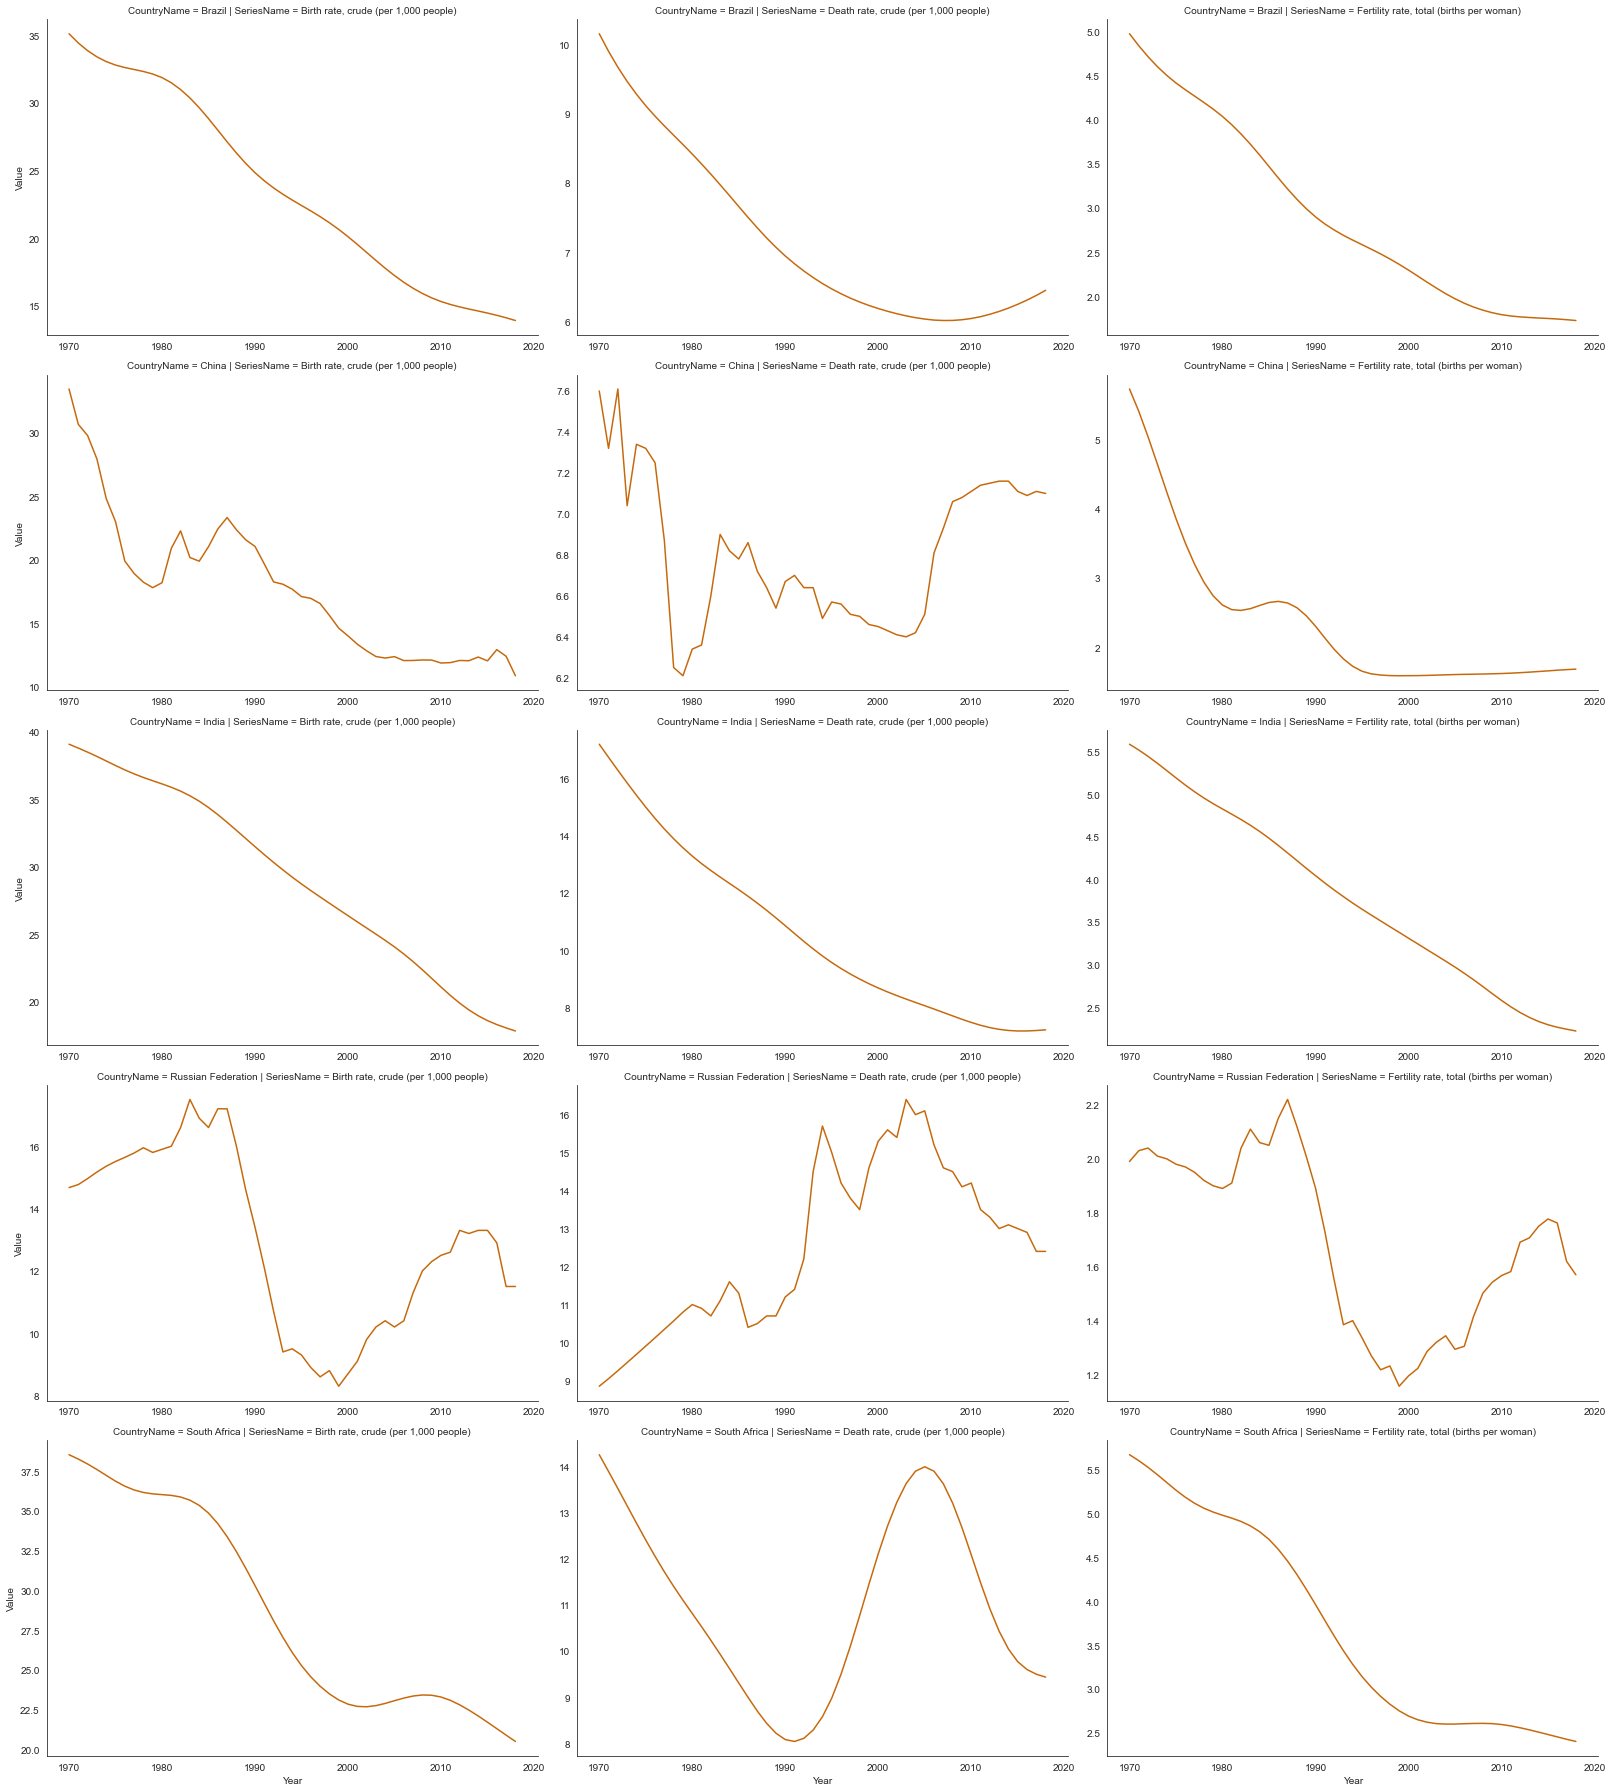

In [91]:
sns.set_palette('PuOr')
sns.set_style('white')
g = sns.FacetGrid(data=birth_death_rate, col='SeriesName', row='CountryName', height=5, aspect=1.5, sharex=False, sharey=False)
g.map(sns.lineplot, 'Year', 'Value')
g.fig.tight_layout()

# Mortality Rate  
Male and female in different age groups

In [43]:
mortality = health.copy()
series = ['Mortality rate, adult, female (per 1,000 female adults)',
          'Mortality rate, adult, male (per 1,000 male adults)',
          'Mortality rate, infant (per 1,000 live births)',
          'Mortality rate, infant, female (per 1,000 live births)',
          'Mortality rate, infant, male (per 1,000 live births)',
          'Mortality rate, neonatal (per 1,000 live births)',
          'Mortality rate, under-5 (per 1,000 live births)',
          'Mortality rate, under-5, female (per 1,000 live births)',
          'Mortality rate, under-5, male (per 1,000 live births)']
mortality = mortality[mortality['SeriesName'].isin(series)]
mortality['AgeGroup'] = mortality['SeriesName'].apply(lambda x: 'Adult' if 'adult' in x else(
    'Infant' if 'infant' in x else('NeoNatal' if 'neonatal' in x else 'under-5')))
mortality['Sex'] = mortality['Sex'].apply(lambda x: 'Total' if 'NA' in x else x)
mortality.sample(10)


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex,AgeGroup
4671,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,China,CHN,1973,95.300,Total,under-5
25509,"Mortality rate, infant, female (per 1,000 live...",SP.DYN.IMRT.FE.IN,South Africa,ZAF,1988,43.100,Female,Infant
31070,"Mortality rate, infant, male (per 1,000 live b...",SP.DYN.IMRT.MA.IN,Brazil,BRA,1992,53.200,Male,Infant
22746,"Mortality rate, under-5, female (per 1,000 liv...",SH.DYN.MORT.FE,China,CHN,1986,51.400,Female,under-5
33833,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,Russian Federation,RUS,1994,178.370,Female,Adult
4672,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,India,IND,1973,202.900,Total,under-5
38001,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,China,CHN,1997,99.431,Female,Adult
49164,"Mortality rate, under-5, male (per 1,000 live ...",SH.DYN.MORT.MA,South Africa,ZAF,2005,83.200,Male,under-5
54705,"Mortality rate, neonatal (per 1,000 live births)",SH.DYN.NMRT,Brazil,BRA,2009,11.600,Total,NeoNatal
15779,"Mortality rate, infant, female (per 1,000 live...",SP.DYN.IMRT.FE.IN,South Africa,ZAF,1981,58.500,Female,Infant


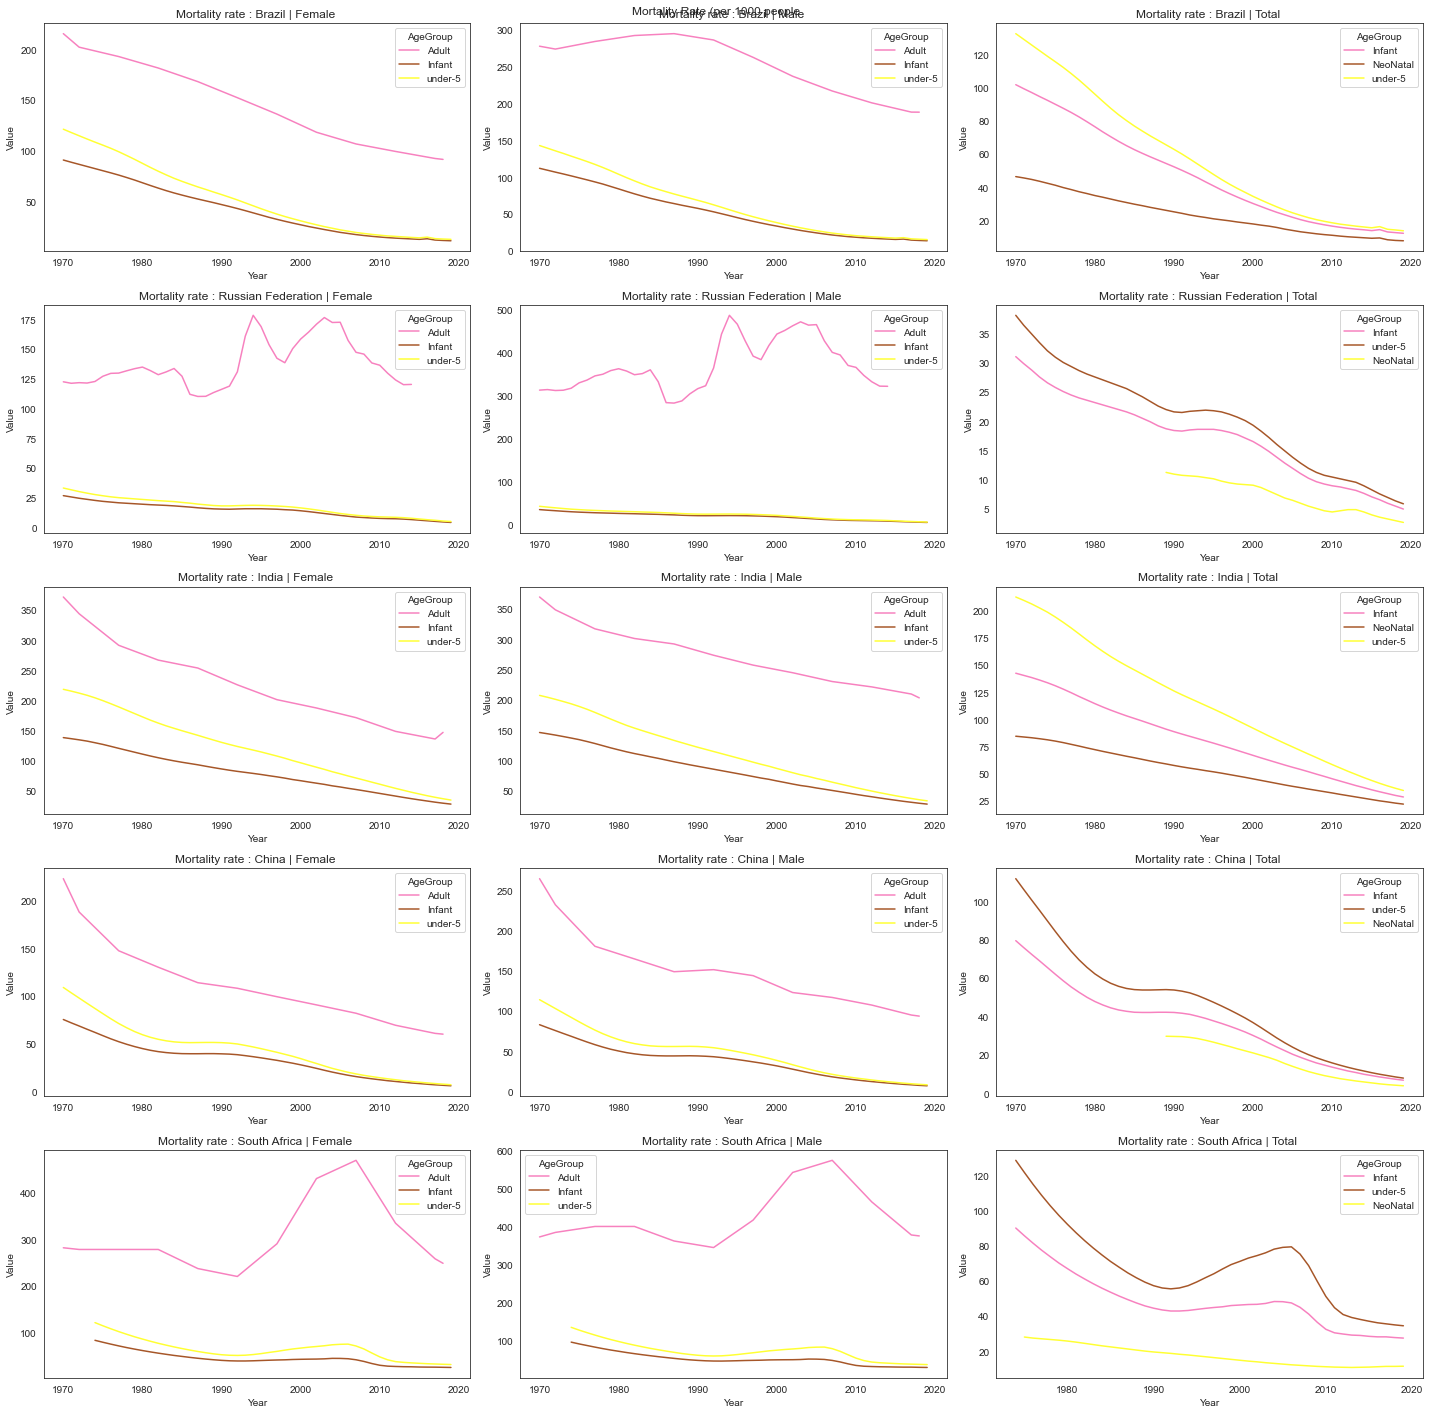

In [47]:
countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
sns.set_palette('Set1_r')
sns.set_style('white')
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
plt.suptitle('Mortality Rate (per 1000 people')
for i, country in enumerate(countries):
    for j, sex in enumerate(mortality['Sex'].unique()):
        a = mortality[(mortality['CountryName']==country) & (mortality['Sex']==sex)]
        sns.lineplot(data=a, x='Year', y='Value', hue='AgeGroup', ax= axs[i,j]).set_title(f'Mortality rate : {country} | {sex} ')
plt.tight_layout()

In [48]:
# Average mortality rate for each country in different age groups
mortality.groupby(['CountryName','Sex','AgeGroup'])['Value'].mean()

CountryName         Sex     AgeGroup
Brazil              Female  Adult       146.582898
                            Infant       41.864000
                            under-5      52.104000
                    Male    Adult       255.466918
                            Infant       52.060000
                            under-5      63.000000
                    Total   Infant       47.080000
                            NeoNatal     23.618000
                            under-5      57.696000
China               Female  Adult       111.147020
                            Infant       33.374000
                            under-5      43.744000
                    Male    Adult       148.495694
                            Infant       37.308000
                            under-5      47.520000
                    Total   Infant       35.404000
                            NeoNatal     16.238710
                            under-5      45.696000
India               Female  Adult       225.6

# Hospital beds
per 1000 people

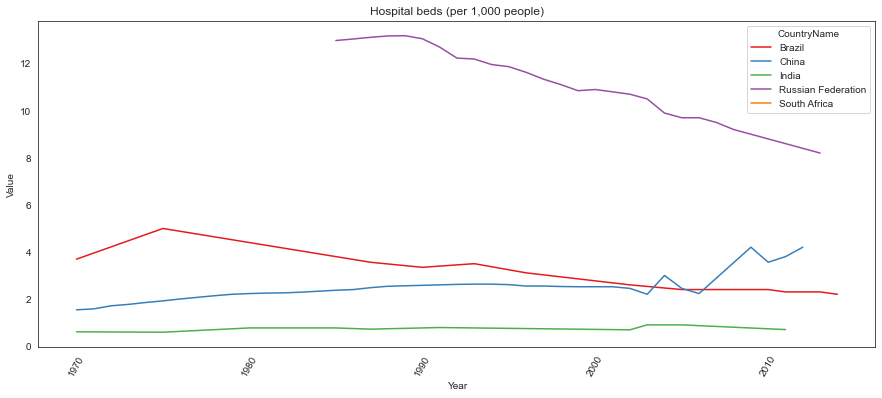

In [52]:
sns.set_palette('Set1')
plt.figure(figsize=(15, 6))
sns.lineplot(data=health[health['SeriesName'] =='Hospital beds (per 1,000 people)'],
             x='Year', y='Value', hue='CountryName').set_title('Hospital beds (per 1,000 people)')
plt.xticks(rotation=60)
plt.show()


# Number of maternal deaths

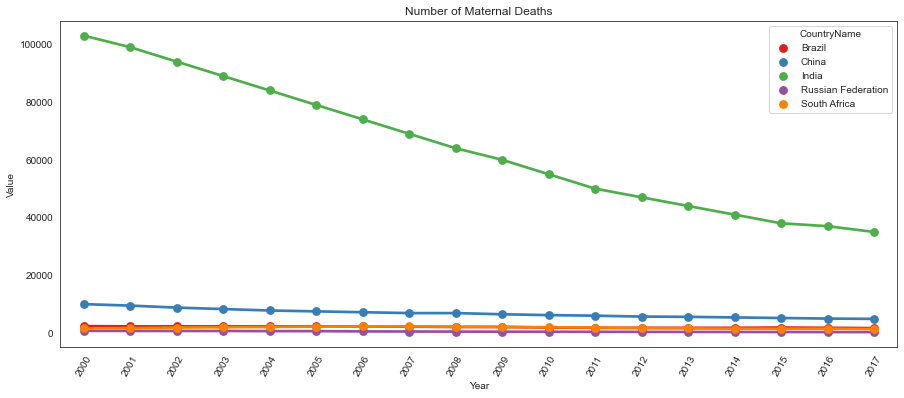

In [53]:
plt.figure(figsize=(15,6))
sns.pointplot(data=health[health['SeriesName'] ==
                          'Number of maternal deaths'],
            x='Year', y='Value', hue='CountryName').set_title('Number of Maternal Deaths')
plt.xticks(rotation=60)
plt.show()


# No. of deaths
In different age groups

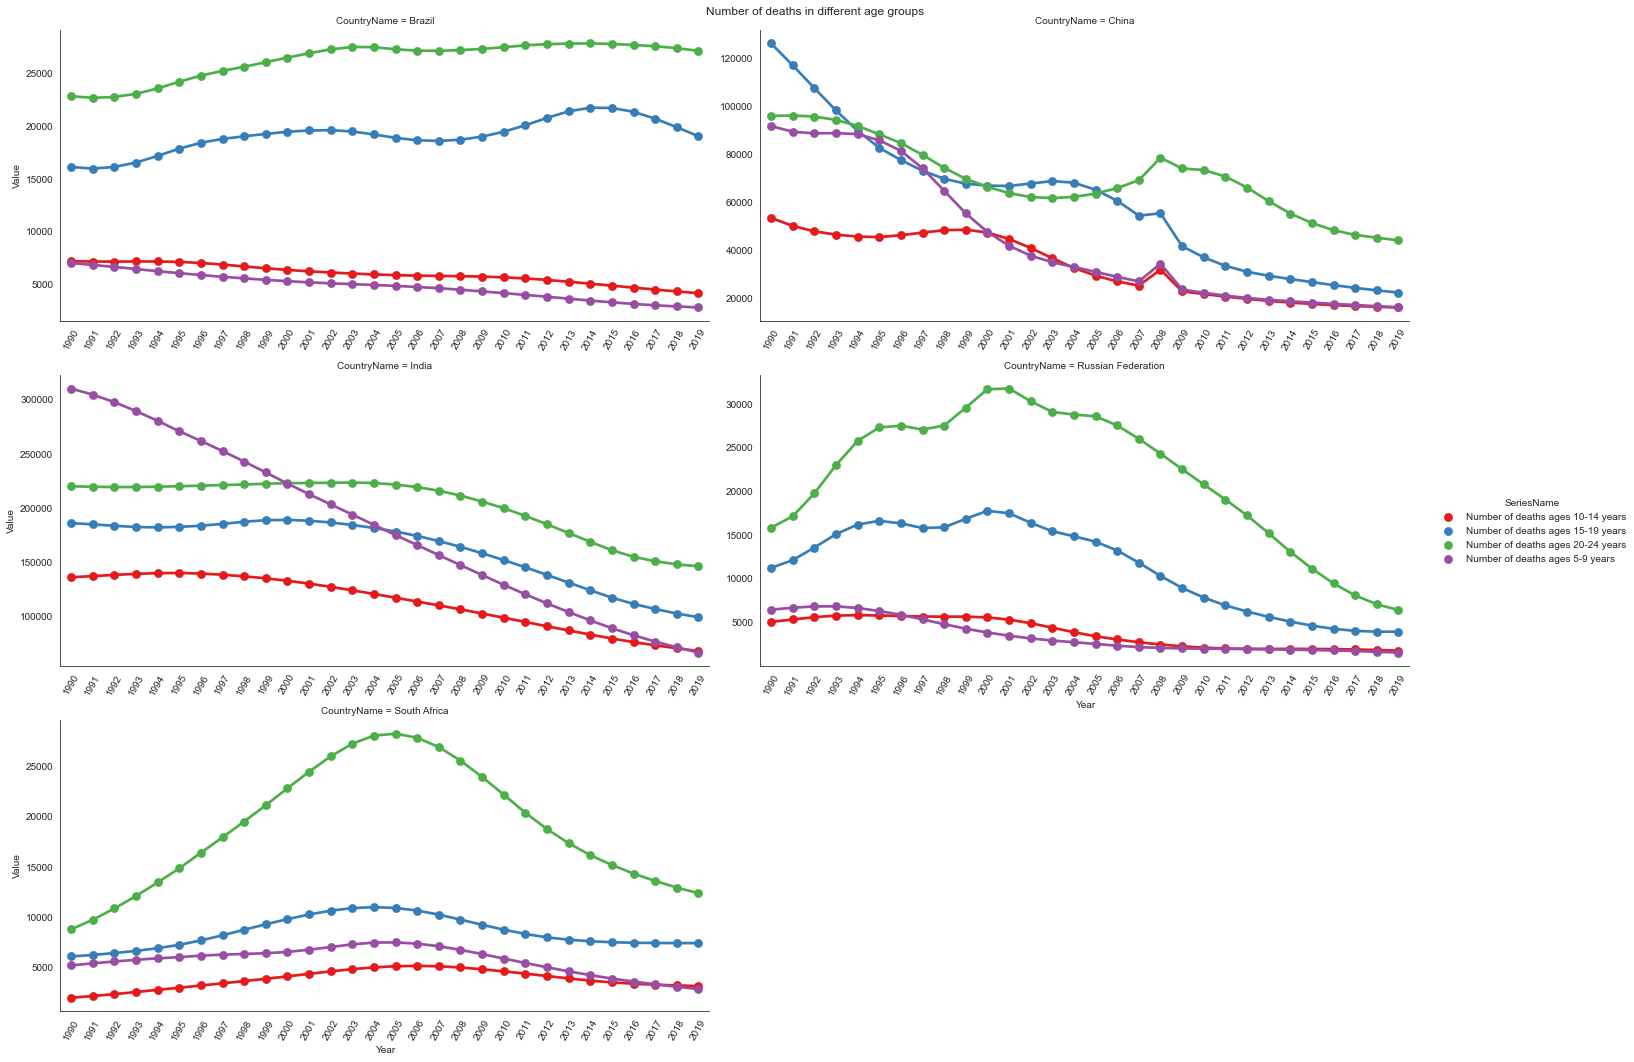

In [76]:
sns.set_palette('Set1')
deaths = ['Number of deaths ages 5-9 years', 
          'Number of deaths ages 10-14 years',
          'Number of deaths ages 15-19 years',
          'Number of deaths ages 20-24 years',]
a = health[health['SeriesName'].isin(deaths)]
# g = sns.FacetGrid(data=a, col='CountryName', col_wrap=2, sharex=False, sharey=False, height=5, aspect=2)
# g.map_dataframe(sns.pointplot, 'Year', 'Value', hue='SeriesName')
g = sns.factorplot(data=a, x='Year', y='Value', hue='SeriesName', col='CountryName', 
                   col_wrap=2, sharex=False,sharey=False, height=5, aspect=2)
g.fig.suptitle('Number of deaths in different age groups')
g.set_xticklabels(rotation=60)
g.tight_layout()

# Annual health expenditure
2000 - 2017

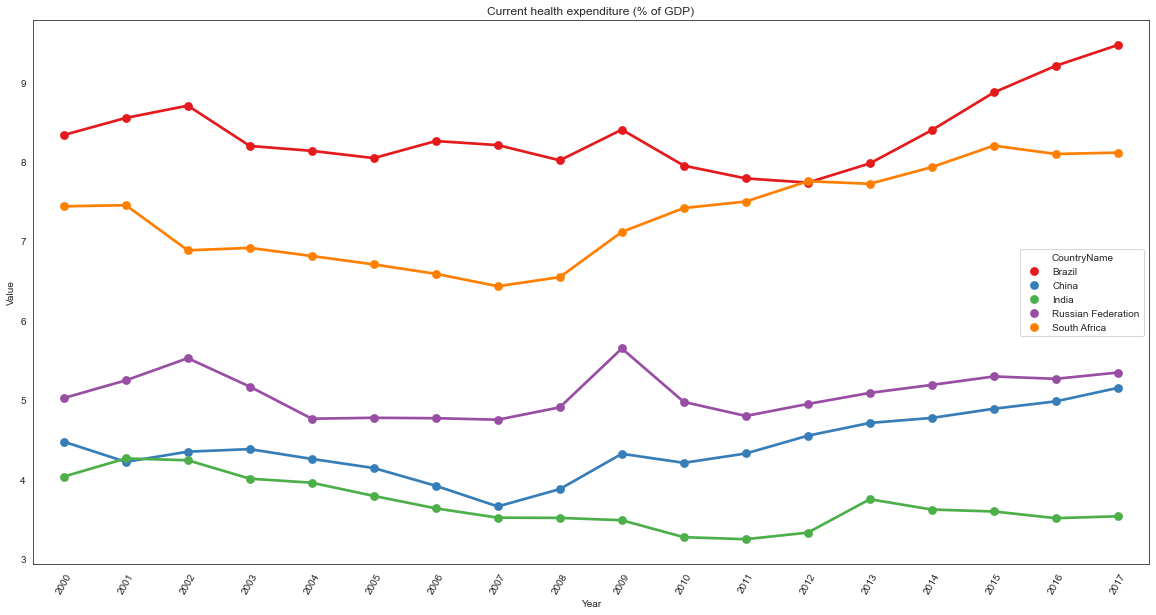

In [59]:
plt.figure(figsize=(20, 10))
sns.pointplot(data=health[health['SeriesName'] =='Current health expenditure (% of GDP)'],
              x='Year', y='Value', hue='CountryName').set_title('Current health expenditure (% of GDP)')
plt.xticks(rotation=60)
plt.show()


# Sanitation
- access to drinking water
- access to sanitation services
- open defecation

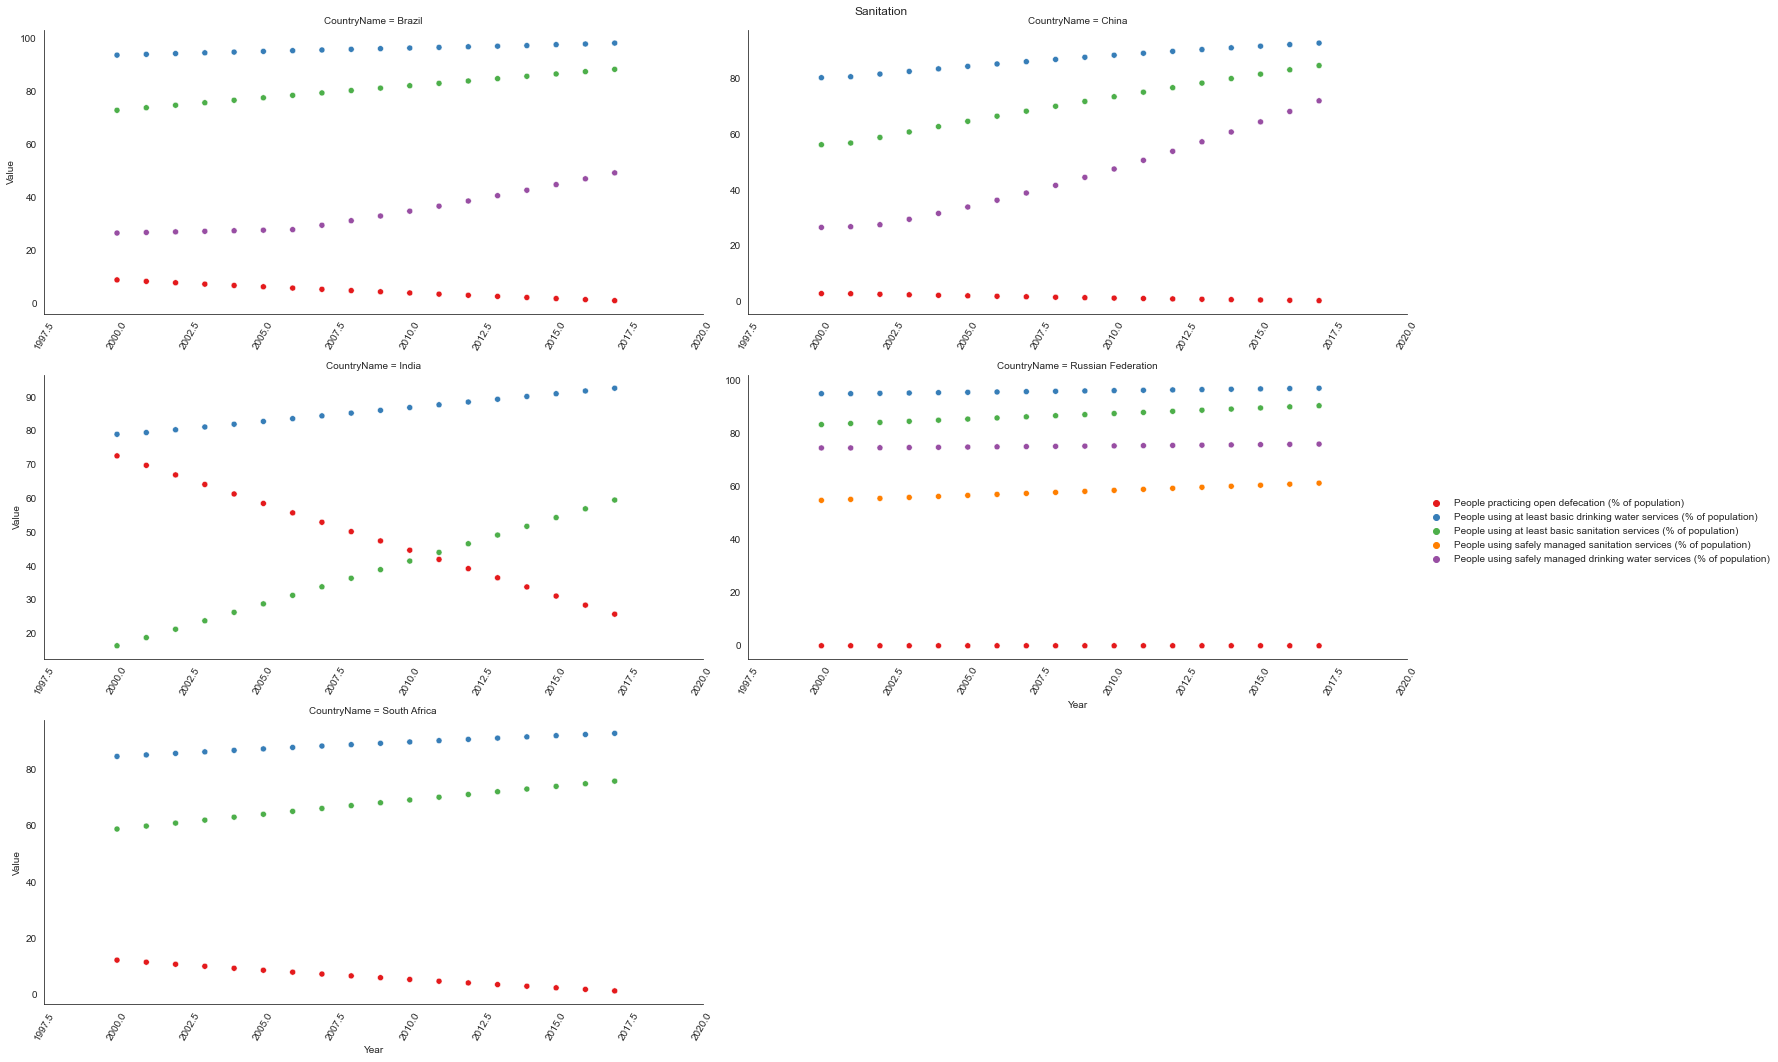

In [63]:

sanitation = ['People using safely managed drinking water services (% of population)',
              'People practicing open defecation (% of population)',
              'People using at least basic drinking water services (% of population)',
              'People using at least basic sanitation services (% of population)',
              'People using safely managed sanitation services (% of population)']
a = health[health['SeriesName'].isin(sanitation)]
g = sns.FacetGrid(data=a, col='CountryName', col_wrap=2,
                  sharex=False, sharey=False, height=5, aspect=2)
g.map(sns.scatterplot, 'Year', 'Value', 'SeriesName')
g.set_xticklabels(rotation=60)
g.fig.suptitle('Sanitation')
g.fig.tight_layout()
g.add_legend()


# Age dependency ratio
Age dependency in:
- total working age population
- working age population, young
- working age population, old

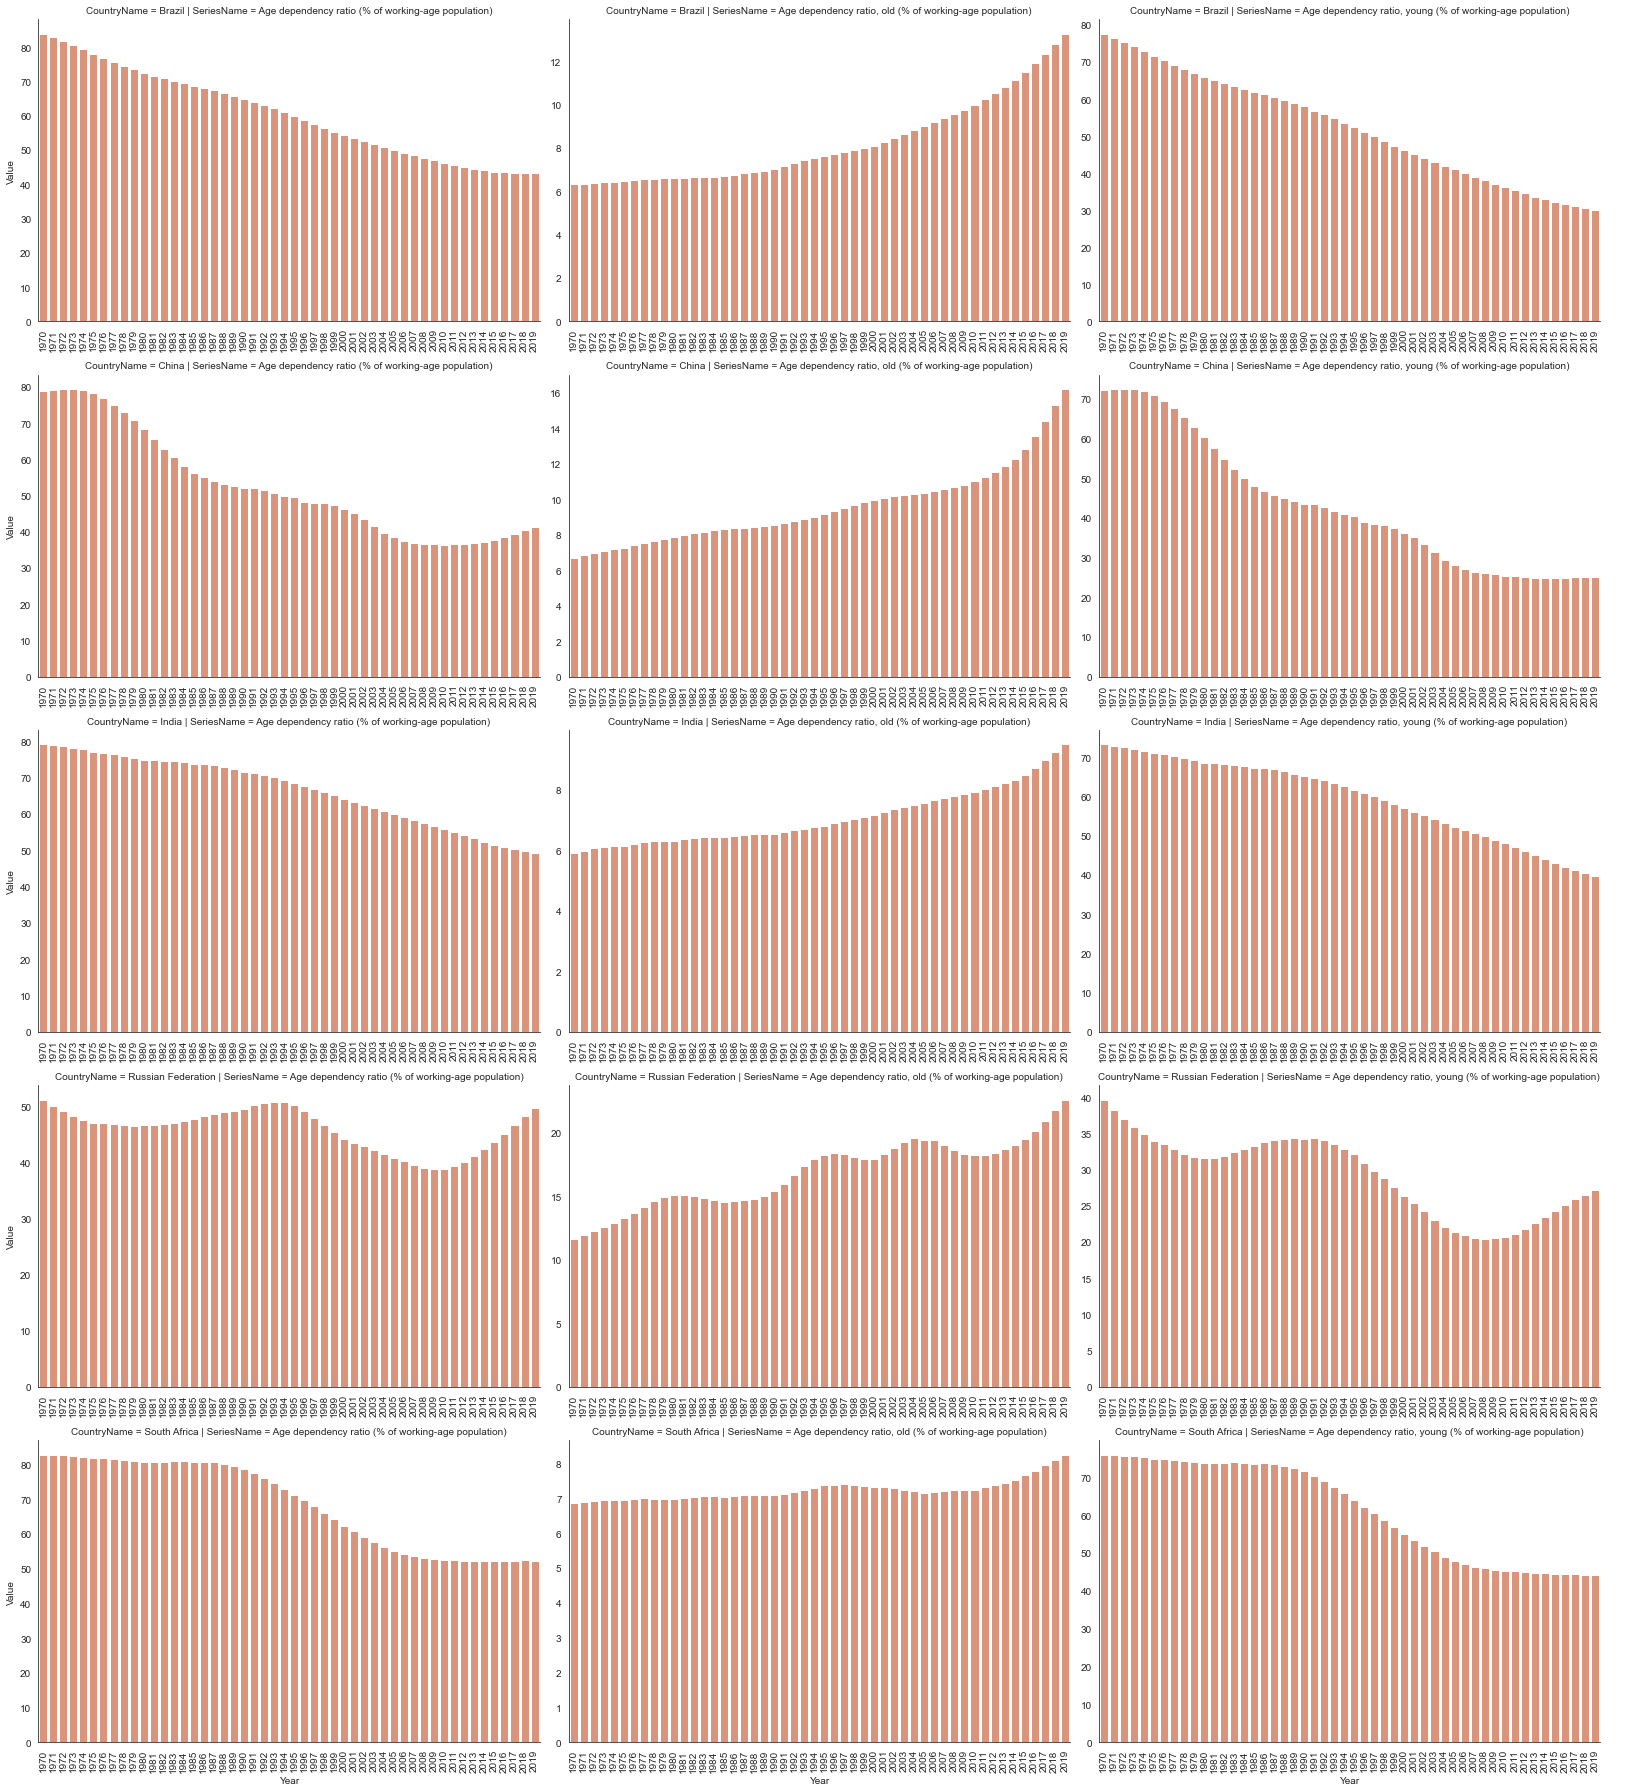

In [64]:
sns.set_palette('flare')
dependency = ['Age dependency ratio (% of working-age population)',
              'Age dependency ratio, old (% of working-age population)',
              'Age dependency ratio, young (% of working-age population)']
a = health[health['SeriesName'].isin(dependency )]
g = sns.FacetGrid(data=a, row='CountryName', col='SeriesName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, 'Year', 'Value')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()


# Share of income
Income shared by highest 20% to lowest 20%

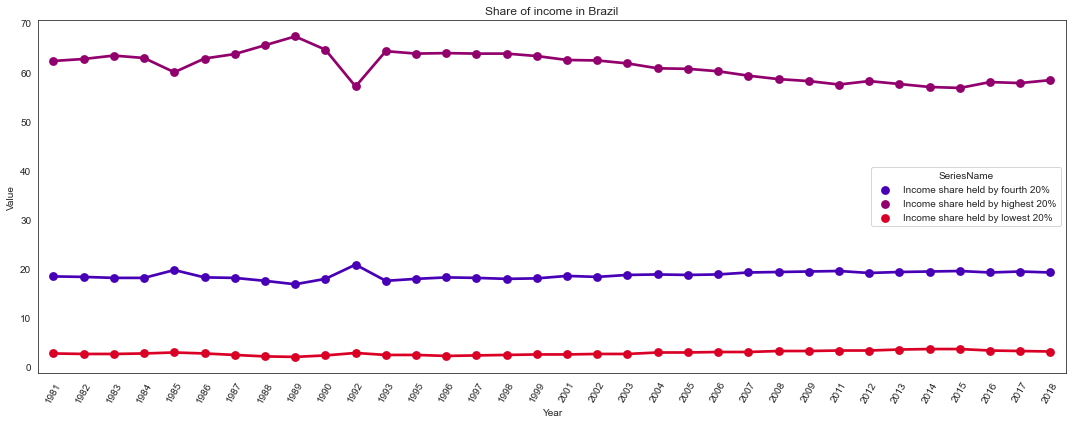

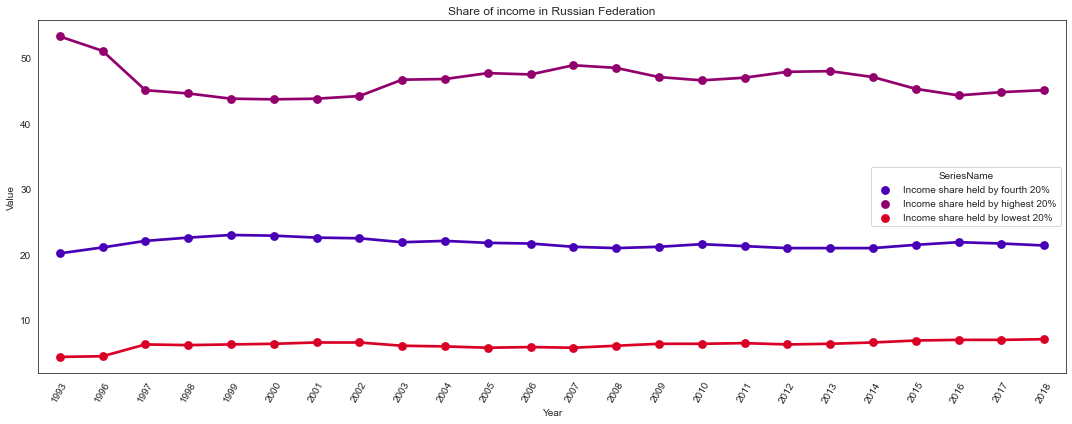

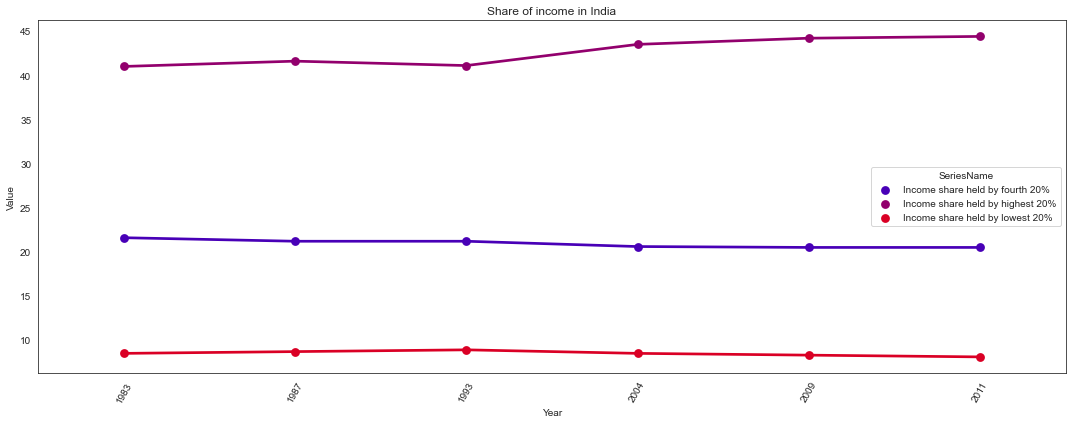

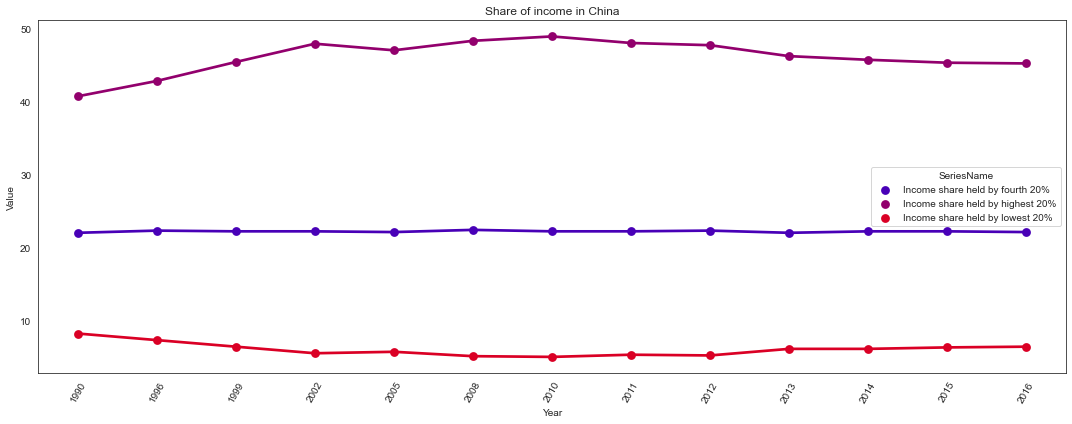

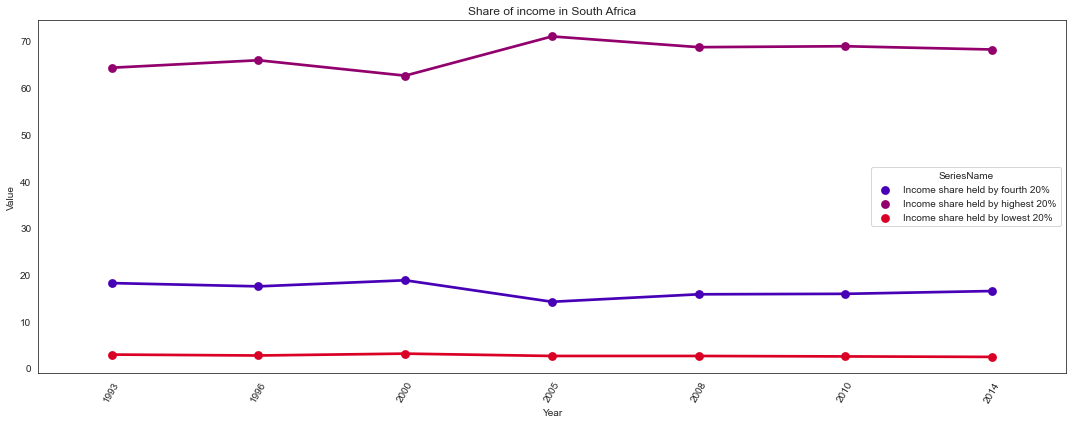

In [90]:
countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
income = [
          'Income share held by highest 20%',
          'Income share held by second 20%'
          'Income share held by third 20%',
          'Income share held by fourth 20%',
          'Income share held by lowest 20%']
share_of_income = health[(health['SeriesName'].isin(income))]

sns.set_palette('brg')
for i, country in enumerate(countries):
    a = share_of_income[share_of_income['CountryName'] == country]
    plt.figure(figsize=(15,6))
    sns.pointplot(data=a, x='Year', y='Value', hue='SeriesName').set_title(f'Share of income in {country}')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()
